<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/D_Strauss_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the necessary libraries need for our analysis.

In [1]:
#import pandas as pd
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
#import seaborn as sns
import seaborn as sns
#import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
#import train test split from sklearn
from sklearn.model_selection import train_test_split
#import metrics from sklearn
from sklearn import metrics
#import cross_val_score from sklearn
from sklearn.model_selection import cross_val_score

**Part 1: Data Aqusition**

Download the data from github and assign it column names by passing a list into the pd.read function.

In [2]:
#Create a list of column names.
col_names = ['Edible_or_Poisin', 'd1', 'd2', 'd3', 'd4','odor', 'd5', 'd6', 'd7', 'gill-color', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14','d15', 'd16', 'd17', 'spore-print-color','d18', 'd19']
#Save the url of our data into the variable mushroom
mushrom = "https://raw.githubusercontent.com/Danjstr/AIM-5001/master/mushroom_data"
#Read the data from mushroom into a dataframe and assign it the column names.
df = pd.read_csv(mushrom, names=col_names)

**Part 2: Data Preperation**

View the head of the data to see what we are working with.

In [3]:
#view the head of data
df.head(5)

,Edible_or_Poisin,d1,d2,d3,d4,odor,d5,d6,d7,gill-color,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,spore-print-color,d18,d19
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Drop any columns that we will not be using in our analysis. We will only be keeping four columns 'Edible_or_Poisin','odor','gill_color','spore_print_color'.

In [4]:
#Drop all columns we will not be using - save it as df1
df1 = df.drop(df.columns[[1, 2,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,21,22]], axis=1)

View the head and tail of the data again to make sure that the drop was done correctly.

In [5]:
#view the head of the new dataframe df1
df1.head()

,Edible_or_Poisin,odor,gill-color,spore-print-color
0,p,p,k,k
1,e,a,k,n
2,e,l,n,n
3,p,p,n,k
4,e,n,k,n


In [6]:
#view the tail of the data
df1.tail()

,Edible_or_Poisin,odor,gill-color,spore-print-color
8114,p,m,y,w
8115,e,n,y,o
8116,p,s,b,w
8117,p,y,b,w
8118,p,f,b,w
8119,e,n,y,b
8120,e,n,y,b
8121,e,n,n,b
8122,p,y,b,w
8123,e,n,y,o


Confirm that we have kept all the columns that we wanted to keep.

In [7]:
#View all columns in df1
df1.columns

Index(['Edible_or_Poisin', 'odor', 'gill-color', 'spore-print-color'], dtype='object')

View the Shape of the data to know how many rows and columns we are working with.

In [8]:
#view the shape of df1
df1.shape

(8124, 4)

View the data types to know if we have to change any of the data types before we get started.

It looks good we don't have to make any changes.

In [9]:
#view the data types of df1
df1.dtypes

Edible_or_Poisin     object
odor                 object
gill-color           object
spore-print-color    object
dtype: object

Use the describe method to determine the count of the number of values in each column, the number of unique values in each column and more.

In [10]:
#View the description of our data. 
df1.describe()

,Edible_or_Poisin,odor,gill-color,spore-print-color
count,8124,8124,8124,8124
unique,2,9,12,9
top,e,n,b,w
freq,4208,3528,1728,2388


Show the info of the data to see if we are missing any null values we need to fill.

In [11]:
#View the info of our data. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Edible_or_Poisin   8124 non-null   object
 1   odor               8124 non-null   object
 2   gill-color         8124 non-null   object
 3   spore-print-color  8124 non-null   object
dtypes: object(4)
memory usage: 254.0+ KB


**Part 3: Exploratory Data Analysis**

Bellow is the necessary attribute information to more easily read the graphs below.

Show the count of the number of edible and poisoned mushrooms.

We can see that our dataframe has slightly more edible values than poison values. But overall the dataframe is fairly well balanced.

Edible_or_Poison:

Edible = e

Poison = p

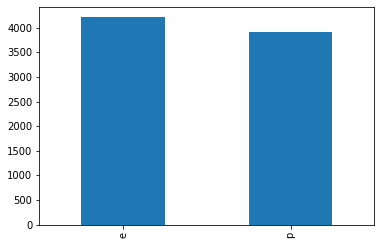

In [12]:
#Create a bar blot of the value_count of 'Edible_or_Poisin'
df1['Edible_or_Poisin'].value_counts().plot.bar()
#Show the result
plt.show()

Show the count of the number of mushrooms organized by odor.

We can see that our dataframe has many values that either do not have a smell or smell foul.

Odor: 

Almond=a

Anise=l

Creosote=c

Fishy=y

Foul=f

Musty=m

None=n

Pungent=p

Spicy=s

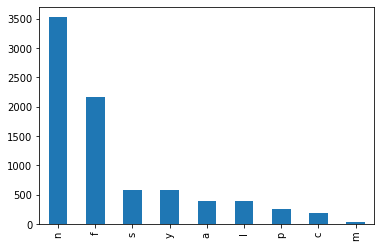

In [13]:
#Create a bar blot of the value_count of 'Odor'
df1['odor'].value_counts().plot.bar()
#show the result
plt.show()

We show a graph of the count of the odor column as above this time colored by if the mushrooms are poisoned or not.

We can glean the following data from our graph on odors.

Almond-Edible

Anise-Edible

creosote-Poisined

fishy-Poisined

foul-Poisined

musty-Poisined

none=Mospoisinedtly Edible

pungent-Poisined

spicy-Poisined

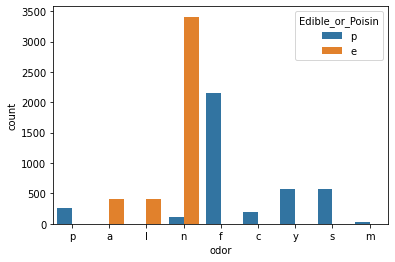

In [14]:
#Create a plot of the count of the number of poisoned and not poisoned mushrooms by odor.
sns.countplot(x='odor', hue='Edible_or_Poisin', data=df1)

Show the count of the number of mushrooms organized by gill color.

We can see that our mushrooms are often buff and pink.

Gill-Color: 

Black=k

Brown=n

Buff=b

Chocolate=h

Gray=g

Green=r

Orange=o

Pink=p

Purple=u

Red=e

White=w 

Yellow=y

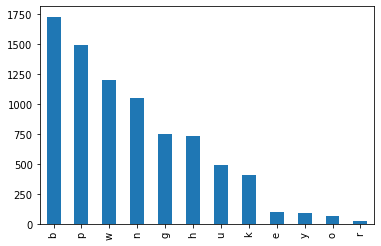

In [15]:
#Create a bar blot of the value_count of 'gill_color'
df1['gill-color'].value_counts().plot.bar()
#show the result
plt.show()

We show a graph of the count of the gill color column as above this time colored by if the mushrooms are poisoned or not.

We can glean the following data from our graph on gill colors.
Most of the data seems to be pretty mixed. At a glance, it almost seems gill color has less of an impact on if a mushroom is poisoned or not. Though mushrooms colored 'buff' seem to be a strong indication that a mushroom is poisonous.

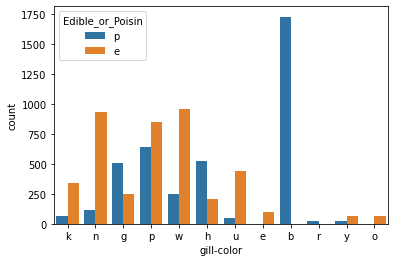

In [16]:
#Create a plot of the count of the number of poisoned and not poisoned mushrooms by gill color.
sns.countplot(x='gill-color', hue='Edible_or_Poisin', data=df1)

Show the count of the number of mushrooms organized by spore print color.

We can see that most of our mushrooms are colored white, brown, black, and chocolate.



spore-print-color: 

Black=k

Brown=n

Buff=b

Chocolate=h

Green=r

Orange=o

Purple=u

White=w

Yellow=y

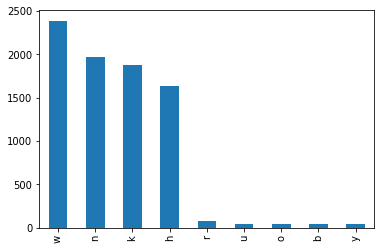

In [17]:
#Create a bar blot of the value_count of 'spore_print_color'
df1['spore-print-color'].value_counts().plot.bar()
#show the result
plt.show()

We show a graph of the count of the spore print color column as above this time colored by if the mushrooms are poisoned or not.

We can glean the following data from our graph on spore print colors.

Black-Mostly Edible

Brown-Mostly Edible

Chocolate-Mostly Poisonous

White-Mostly Many Poisonous but some Edible

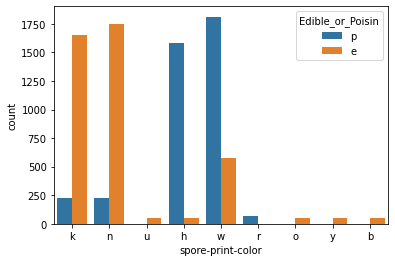

In [18]:
#Create a plot of the count of the number of poisoned and not poisoned mushrooms by spore print color.
sns.countplot(x='spore-print-color', hue='Edible_or_Poisin', data=df1)

View the head of the data so that we know what we are working with. It is time to begin prepping the data for use in a logistic regression model.

In [19]:
#View the head of the data
df1.head()

,Edible_or_Poisin,odor,gill-color,spore-print-color
0,p,p,k,k
1,e,a,k,n
2,e,l,n,n
3,p,p,n,k
4,e,n,k,n


Change our edible and poison values into 0's and 1's.
We want edible mushrooms to be labeled as 0 and poisoned mushrooms to be labeled 1.

In [20]:
#Create a mapping that makes e = 0 and p = 1
class_mapping = {'e':0,'p':1}
#Assign the mapping to the Edible_or_poisin column
df1['Edible_or_Poisin'] = df1['Edible_or_Poisin'].map(class_mapping)
#Show the head of the data
df1.head()

,Edible_or_Poisin,odor,gill-color,spore-print-color
0,1,p,k,k
1,0,a,k,n
2,0,l,n,n
3,1,p,n,k
4,0,n,k,n


Use the get dummies function to create new columns for each of the unique values in the data frame. These new columns will be in the right format to train a logistic regression model.

In [21]:
#Use the get dummies function to prep the data for our logistic regression - Save it as df2
df2=pd.get_dummies(df1)
#Show the result
df2

,Edible_or_Poisin,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
8121,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Part 4: Build Predictive Models**

We need to know how well we would do if we were guessing at random if a mushroom is edible or poisonous. It seems our odds are roughly 50/50 with a random guess.

In [22]:
#check how well we would perform without traning
df1['Edible_or_Poisin'].values.sum()/df1.shape[0]

0.48202855736090594

Create three new dataframes. x_odor, x_gill and x_spore. These three dataframes will each have their respective dummy data saved into them. 

In [23]:
#Create new datframes that contain the dummies of the Odor, Gill_Color, and Spore_Print_Color
x_Odor = df2[['odor_a','odor_c','odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y']]
x_gill=df2[['gill-color_b',	'gill-color_e',	'gill-color_g',	'gill-color_h',	'gill-color_k',	'gill-color_n',	'gill-color_o',	'gill-color_p',	'gill-color_r',	'gill-color_u',	'gill-color_w',	'gill-color_y']]
x_spore=df2[['spore-print-color_b',	'spore-print-color_h',	'spore-print-color_k',	'spore-print-color_n',	'spore-print-color_o',	'spore-print-color_r',	'spore-print-color_u',	'spore-print-color_w',	'spore-print-color_y']]


View the head of all three of the new dataframes to make sure that they have been made correctly.

In [24]:
#View the head of the new odor dummies
x_Odor.head(5)

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0


In [25]:
#View the head of the new Gill_Color dummies
x_gill.head(5)

,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
#View the head of the new Spore_Print_Color dummies
x_spore.head(5)

,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


Create a new variable y_poisin that containing all the data from the 'Edible_or_Poisin column'.

In [27]:
#Assign the edible or poison data to the variable y_poisin
y_Poisin = df2['Edible_or_Poisin']
#Show the head
y_Poisin.head(5)

0    1
1    0
2    0
3    1
4    0
Name: Edible_or_Poisin, dtype: int64

Create a train test split of the Odor dummies and the poisoned column.

In [29]:
#Create a train test split of the odor dummies
o_x_train,o_x_test,o_y_train,o_y_test = train_test_split(x_Odor, y_Poisin, random_state=1)


Create a train test split of the gill_color dummies and the poisoned column.

In [30]:
#Create a train test split of the Gill_Color dummies
g_x_train,g_x_test,g_y_train,g_y_test = train_test_split(x_gill, y_Poisin, random_state=1)

Create a train test split of the spore_print_color dummies and the poisoned column.

In [31]:
#Create a train test split of the Spore_Print_Color dummies
s_x_train,s_x_test,s_y_train,s_y_test = train_test_split(x_spore, y_Poisin, random_state=1)

Create a model for the oder data and make it a logistic regression. Fit the model on our training data and run it.

In [33]:
#Create the variable o_model for the odor data and make it a logistic regression model
o_model = LogisticRegression()
#Fit the training data to the o_model
o_model = o_model.fit(g_o_train, g_o_train)
#Confirm that the model has run correctly
o_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Create a model for the gill_collor data and make it a logistic regression. Fit the model on our training data and run it.

In [ ]:
#Create the variable g_model for the gill_color data and make it a logistic regression model
g_model = LogisticRegression()
#Fit the training data to the g_model
g_model = g_model.fit(g_x_train, g_y_train)
#Confirm that the model has run correctly
g_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Create a model for the spore print color data and make it a logistic regression. Fit the model on our training data and run it.

In [34]:
#Create the variable s_model for the spore_print_color data and make it a logistic regression model
s_model = LogisticRegression()
#Fit the training data to the s_model
s_model = s_model.fit(s_x_train, s_y_train)
#Confirm that the model has run correctly
s_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

View the accuracy of our training data and test data for our odor model.

Our training data indicates that it can correctly tell what mushrooms are poisonous 98.6 % of the time. While our test data indicates that we are right 98.2% of the time.



In [35]:
#check the accuracy of the o_model training set
o_model.score(o_x_train, o_y_train)

0.9862136878385032

In [36]:
#check the accuracy of the o_model testing set
o_model.score(o_x_test, o_y_test)

0.982274741506647

View the accuracy of our training data and test data for our gill_color_data model.

Our training data indicates that it can correctly tell what mushrooms are poisonous 80 % of the time. While our test data indicates that we are also right 80% of the time.

In [37]:
#check the accuracy of the g_model training set
g_model.score(g_x_train, g_y_train)

0.8055145248645987

In [38]:
#check the accuracy of the g_model testing set
g_model.score(g_x_test, g_y_test)

0.8035450516986706

View the accuracy of our training data and test data for our spore_print_color model.

Our training data indicates that it can correctly tell what mushrooms are poisonous 86.4% of the time. While our test data indicates that we are right 87.7% of the time.

In [39]:
#check the accuracy of the s_model training set
s_model.score(s_x_train, s_y_train)

0.8647628426062695

In [40]:
#check the accuracy of the s_model testing set
s_model.score(s_x_test, s_y_test)

0.8778926637124569

In Conclusion: The smell of a mushroom seems to be the best performing indicator of if a mushroom is poisonous or not. This is followed by spore print color and then the gill color.

If I was to recommend further analysis then I would run similar models for each of the columns of our original dataframe. Such models would help us isolate the highest performing data. We could then create a new and improved model with only the highest performing data. A dataset trained with that has a chance of yielding a higher accuracy.